<a href="https://colab.research.google.com/github/DeV-Parekh/ML_Tasks/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
PlayTennis = pd.read_csv("/content/PlayTennis.csv")

In [ ]:
PlayTennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
PlayTennis['outlook'].replace(['sunny', 'overcast','rainy'],[0, 1,2], inplace=True)

In [ ]:
PlayTennis

,outlook,temp,humidity,windy,play
0,0,hot,high,False,no
1,0,hot,high,True,no
2,1,hot,high,False,yes
3,2,mild,high,False,yes
4,2,cool,normal,False,yes
5,2,cool,normal,True,no
6,1,cool,normal,True,yes
7,0,mild,high,False,no
8,0,cool,normal,False,yes
9,2,mild,normal,False,yes


In [ ]:
PlayTennis['temp'].replace(['hot', 'mild','cool'],[0, 1,2], inplace=True)
PlayTennis['humidity'].replace(['high', 'normal'],[0, 1], inplace=True)
PlayTennis['play'].replace(['yes', 'no'],[0, 1], inplace=True)

In [ ]:
PlayTennis


,outlook,temp,humidity,windy,play
0,0,0,0,False,1
1,0,0,0,True,1
2,1,0,0,False,0
3,2,1,0,False,0
4,2,2,1,False,0
5,2,2,1,True,1
6,1,2,1,True,0
7,0,1,0,False,1
8,0,2,1,False,0
9,2,1,1,False,0


In [ ]:
PlayTennis['windy'].replace(['False', 'True'],[0, 1], inplace=True)


In [ ]:
PlayTennis

,outlook,temp,humidity,windy,play
0,0,0,0,False,1
1,0,0,0,True,1
2,1,0,0,False,0
3,2,1,0,False,0
4,2,2,1,False,0
5,2,2,1,True,1
6,1,2,1,True,0
7,0,1,0,False,1
8,0,2,1,False,0
9,2,1,1,False,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['windy'] = Le.fit_transform(PlayTennis['windy'])

In [ ]:
PlayTennis

,outlook,temp,humidity,windy,play
0,0,0,0,0,1
1,0,0,0,1,1
2,1,0,0,0,0
3,2,1,0,0,0
4,2,2,1,0,0
5,2,2,1,1,1
6,1,2,1,1,0
7,0,1,0,0,1
8,0,2,1,0,0
9,2,1,1,0,0


In [ ]:
X = PlayTennis.values[:, 0:4]
X

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [2, 1, 0, 0],
       [2, 2, 1, 0],
       [2, 2, 1, 1],
       [1, 2, 1, 1],
       [0, 1, 0, 0],
       [0, 2, 1, 0],
       [2, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 0],
       [2, 1, 0, 1]])

In [ ]:
Y = PlayTennis.values[:,4]
Y

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



X_train, x_test, Y_train, y_test = train_test_split( 
    X, Y, test_size = 0.2, random_state = 5)

clf_entropy = DecisionTreeClassifier(
            criterion = "entropy")
  
# Performing training
clf_entropy.fit(X_train, Y_train)
clf_entropy

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = clf_entropy.predict(x_test)
print("Predicted values:")
y_pred

Predicted values:


array([0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('---------------------------------------------')
print("Confusion Matrix: ")

print(confusion_matrix(y_test, y_pred))




---------------------------------------------
Confusion Matrix: 
[[0 0]
 [1 2]]


In [ ]:
print('---------------------------------------------')
print ("Accuracy : ")
print(accuracy_score(y_test,y_pred)*100)




---------------------------------------------
Accuracy : 
66.66666666666666


In [ ]:
import warnings
warnings.filterwarnings('ignore')


print('---------------------------------------------')
print("Report : ")
print(classification_report(y_test, y_pred))



---------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



[Text(0.5, 0.9, 'x[2] <= 0.5\nentropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.16666666666666666, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.5, 'x[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.7, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

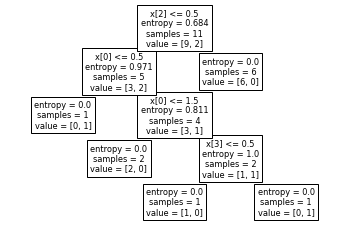

In [ ]:
from sklearn import tree

tree.plot_tree(clf_entropy)

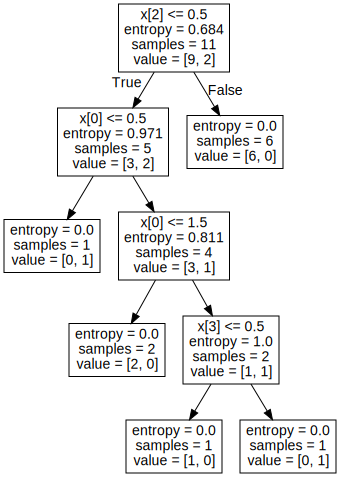

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_entropy)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model,_X,_y,_cv):
  _scoring = ['accuracy','precision','recall','f1']
  results = cross_validate(estimator = model,X=_X,y=_y,cv=_cv,scoring = _scoring,return_train_score = True)
  return {
      "Training Accuracy scores": results['train_accuracy'].mean()*100,
      "Training Precision": results['train_precision'].mean(),
      "Training Recall": results['train_recall'].mean(),
      "Training F1 Score": results['train_f1'].mean(),
      "Validation Accuracy scores": results['test_accuracy'].mean()*100,
      "Validation Precision": results['test_precision'].mean(),
      "Validation Recall": results['test_recall'].mean(),
      "Validation F1 Score": results['test_f1'].mean()
  }

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



# clf = DecisionTreeClassifier(
#             criterion = "entropy")

# clf = cross_validation(clf,X,Y,6)
# clf['Validation Accuracy scores']
lst = []

for k in range(2,10):
  clf = DecisionTreeClassifier(
              criterion = "entropy")

  clf = cross_validation(clf,X,Y,k)
  lst.append([clf['Validation Accuracy scores'],k])

print(lst)
print(max(lst))

[[71.42857142857143, 2], [71.66666666666667, 3], [75.0, 4], [73.33333333333333, 5], [69.44444444444443, 6], [64.28571428571429, 7], [68.75, 8], [61.111111111111114, 9]]
[75.0, 4]
